In [2]:
import numpy as np
import h5py
import time
import copy
from random import randint
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class NN():
    def __init__(self,loss_function,grad,init,f):
        self.x=0
        self.y=0
        self.predy=0
        self.loss=0.0
        self.lossf=loss_function
        self.theta=init
        self.alpha=0.1
        self.grad=grad
        self.f=f
        self.tmp_grad=[0]*len(init)
        self.count=0
        
    def adjust_rate(self,alpha):
        self.alpha=alpha
        
    def backward(self,data_x,data_y):
        self.x=data_x
        self.y=data_y
        theta_num=len(self.theta)
        for k in range(theta_num):
            grad_result=self.grad[k](self.x,self.y,self.predy,self.theta)
           # print(grad_result.shape)
            if self.count==0:
                self.tmp_grad[k]=grad_result
            else:
                self.tmp_grad[k]=self.tmp_grad[k]*self.count/(self.count+1)+grad_result/(self.count+1)
        self.count+=1
        
    def step(self):
        theta_num=len(self.theta)
        for k in range(theta_num):
            self.theta[k]-=self.alpha*self.tmp_grad[k]
        self.count=0
        self.tmp_grad=[0]*theta_num
        
                   
    def forward(self,data_x):
        y=self.f(data_x,self.theta)
        self.predy=y
        return y
    
    def get_loss(self):
        
        loss=self.lossf(self.predy,self.y)
        return loss
    
    def save(self):
        return self.theta

In [77]:
def draw(loss,accur):
    line_x=[k for k in range(len(loss))]
    fig, ax1 = plt.subplots(figsize=(8,5))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.plot(line_x, loss, 'b-')
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    ax2.set_ylabel('Accuracy')  # we already handled the x-label with ax1
    line_x=[k for k in range(len(accur))]
    ax2.plot(line_x, accur, "r-")
    ax2.tick_params(axis='y')

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

In [4]:
MNIST_data = h5py.File('MNISTdata.hdf5', 'r')
x_train = np.float32(MNIST_data['x_train'][:] )
y_train = np.int32(np.array(MNIST_data['y_train'][:,0]))
x_test = np.float32( MNIST_data['x_test'][:] )
y_test = np.int32( np.array( MNIST_data['y_test'][:,0] ) )
MNIST_data.close()

## Logistics

In [117]:
INPUT_SIZE=28*28
BATCH_SIZE=100
OUTPUT_SIZE=10
SAMPLE_SIZE=int(x_train.size/(INPUT_SIZE))

In [6]:
def normalize(x):
    x=np.array(x)
    mean=np.mean(x)
    std=np.std(x)
    x=(x-mean)/std
    return x

def shuffle(X,Y):
    n_random = np.random.shuffle([i for i in range(Y.size)])
    new_x=X[n_random][:]
    new_y=Y[n_random]

    return new_x[0],new_y[0]

In [7]:
X=normalize(x_train)
Y=np.array(y_train)
X_test=normalize(x_test)

In [10]:
X.shape

(60000, 784)

In [61]:
def cross_entropy_error(x,y):
    return -np.log(x[int(y)])

In [62]:
def softmax(z):
    ZZ = np.exp(z)/np.sum(np.exp(z))
    return ZZ

In [63]:
def f_theta(x,theta):
    xx=np.dot(theta[0],x)
    return softmax(xx)

In [64]:
def vec_transpose(x):
    y=np.array([x])
    return y.T

In [67]:
def grad_f(x,y,predy,theta):
    ey=np.zeros(OUTPUT_SIZE)
    ey[int(y)]=1
    out=-np.dot(vec_transpose(ey-predy),np.array([x]))
    return out

In [68]:
theta=np.zeros((OUTPUT_SIZE,INPUT_SIZE))
theta_0=[theta]
grad_func=[grad_f]

In [69]:
model=NN(loss_function=cross_entropy_error,grad=grad_func,f=f_theta,init=theta_0)

In [70]:
loss_list=[]
accur_list=[]

In [147]:
def train_test(N):
    for epoch in range(N):
        data_x,data_y=shuffle(X,Y)
        pos=0
        lo=0.0
       
        batch_loss=[]
       
        while pos+BATCH_SIZE<=SAMPLE_SIZE:
            #print((time.clock()-t1)*1000)
            x=data_x[pos:pos+BATCH_SIZE][:]
            y=data_y[pos:pos+BATCH_SIZE]
            for i in range(BATCH_SIZE): 
                t1=time.clock()
                predy=model.forward(x[i][:])
                print("Forward:")
                print((time.clock()-t1)*1000)
                model.backward(x[i][:],y[i])
                print("Backward:")
                print((time.clock()-t1)*1000)
            print("Step:")    
            model.step()
            print((time.clock()-t1)*1000)
            loss=model.get_loss()
            #print(loss)
            batch_loss.append(loss)
            pos+=BATCH_SIZE
        
        epoch_loss=np.mean(batch_loss)

        #if epoch%2==0:
        print("Epoch:{},Loss:{}".format(epoch,epoch_loss))
        loss_list.append(epoch_loss)
        accur=test()
        accur_list.append(accur)
        
        
def train(N):
    for epoch in range(N):
        data_x,data_y=shuffle(X,Y)
        pos=0
        lo=0.0
       
        batch_loss=[]
       
        while pos+BATCH_SIZE<=SAMPLE_SIZE:
            #print((time.clock()-t1)*1000)
            x=data_x[pos:pos+BATCH_SIZE][:]
            y=data_y[pos:pos+BATCH_SIZE]
            for i in range(BATCH_SIZE): 
                t1=time.clock()
                predy=model.forward(x[i][:])
                #print("Forward:")
                #print((time.clock()-t1)*1000)
                model.backward(x[i][:],y[i])
                #print("Backward:")
                #print((time.clock()-t1)*1000)
            #print("Step:")    
            model.step()
            #print((time.clock()-t1)*1000)
            loss=model.get_loss()
            #print(loss)
            batch_loss.append(loss)
            pos+=BATCH_SIZE
        
        epoch_loss=np.mean(batch_loss)

        #if epoch%2==0:
        print("Epoch:{},Loss:{}".format(epoch,epoch_loss))
        loss_list.append(epoch_loss)
        accur=test()
        accur_list.append(accur)

      

    
def test():
    total_correct=0
    for i in range(y_test.size):
        pred_y=model.forward(X_test[i][:])
        prediction = np.argmax(pred_y)
        real=y_test[i]
        if(prediction==real):
            total_correct+=1

    return total_correct/y_test.size

In [72]:
model.adjust_rate(0.01)
train(5)

Epoch:0,Loss:0.4527562285470066
Epoch:1,Loss:0.2713402591077585
Epoch:2,Loss:0.2453604109327234
Epoch:3,Loss:0.23189340879397094
Epoch:4,Loss:0.22314652519501776


In [73]:
model.adjust_rate(0.005)
train(10)

Epoch:0,Loss:0.2177571082559837
Epoch:1,Loss:0.21507591449907149
Epoch:2,Loss:0.21260483917022152
Epoch:3,Loss:0.21039006859526255
Epoch:4,Loss:0.20839400692957072
Epoch:5,Loss:0.20657927296884598
Epoch:6,Loss:0.20491559726755365
Epoch:7,Loss:0.20337947557794572
Epoch:8,Loss:0.20195256224237432
Epoch:9,Loss:0.2006202989552132


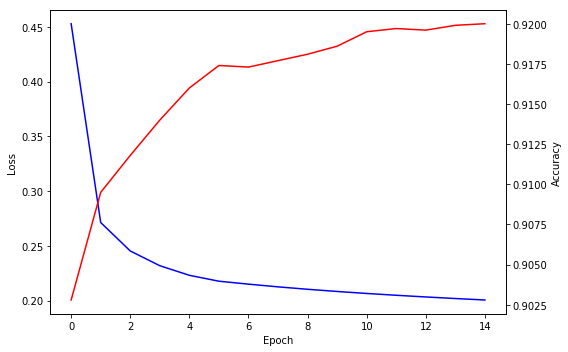

In [78]:
draw(loss_list,accur_list)

## One hidden, Fully-connected

In [83]:
#theta[0]: C; theta[1]: W
HIDDEN_UNIT=100

In [99]:
def sigmoid(x):
    y=np.array(x)
    y[y<0]=0
    return y

def sigmoid_dev(x):
    y=np.array(x)
    y[y>0]=1
    y[y<=0]=0
    return y

def Z(x,theta):
    return np.dot(theta[1],x)

def H(x,theta):
    return sigmoid(Z(x,theta))

def U(x,theta):
    return np.dot(theta[0],H(x,theta))

def f_theta(x,theta):
    x=np.dot(theta[1],x)
    x=sigmoid(x)
    x=np.dot(theta[0],x)
    return softmax(x)

In [142]:
def grad_C(x,y,predy,theta):
    t=time.clock()
    ey=np.zeros(OUTPUT_SIZE)
    ey[int(y)]=1
    out=-np.dot(vec_transpose(ey-predy),np.array([H(x,theta)]))
    return out

In [143]:
def grad_W(x,y,predy,theta):
    t=time.clock()
    ey=np.zeros(OUTPUT_SIZE)
    ey[int(y)]=1
    delta=-np.dot(theta[0].T,(ey-predy))
    out=delta*sigmoid_dev(Z(x,theta))
    out=np.dot(vec_transpose(out),np.array([x]))
    return out

In [148]:
C=np.random.randn(OUTPUT_SIZE,HIDDEN_UNIT)/np.sqrt(HIDDEN_UNIT)
W=np.random.randn(HIDDEN_UNIT,INPUT_SIZE)/np.sqrt(INPUT_SIZE)
theta_0=[C,W]
grad_func=[grad_C,grad_W]

In [149]:
model=NN(loss_function=cross_entropy_error,grad=grad_func,f=f_theta,init=theta_0)
loss_list=[]
accur_list=[]

In [150]:
model.adjust_rate(0.01)
train(5)

Epoch:0,Loss:0.5532323872740064
Epoch:1,Loss:0.24472951169920748
Epoch:2,Loss:0.19943388610021504
Epoch:3,Loss:0.1727719373079527
Epoch:4,Loss:0.15377154373475457


In [152]:
model.adjust_rate(0.005)
train(5)

Epoch:0,Loss:0.14304935216386142
Epoch:1,Loss:0.13701481190687764
Epoch:2,Loss:0.1312813762994616
Epoch:3,Loss:0.12608954441502726
Epoch:4,Loss:0.12146676285627483


In [154]:
model.adjust_rate(0.001)
train(10)

Epoch:0,Loss:0.11776091103993239
Epoch:1,Loss:0.11741493767195048
Epoch:2,Loss:0.11668546029978505
Epoch:3,Loss:0.115932857183715
Epoch:4,Loss:0.11516860239278133
Epoch:5,Loss:0.11441308061328445
Epoch:6,Loss:0.1136587477296009
Epoch:7,Loss:0.11291851685062618
Epoch:8,Loss:0.11218857097829954
Epoch:9,Loss:0.1114631642545162


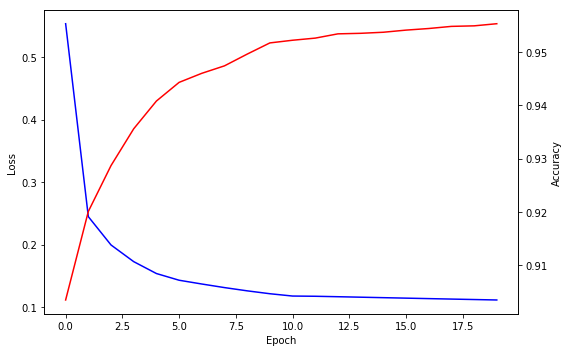

In [155]:
draw(loss_list,accur_list)